In [1]:
# загрузка библиотек
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [4]:
# загрузка датасета
pizza = pd.read_csv('pizza_sales.csv', encoding='1251')
pizza

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [36]:
# проверка на наличие дубликатов
pizza[pizza.duplicated()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_month,order_day


In [5]:
# просмотр информации по датасету, наличие пустых значений, типов данных
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


Ни в одной колонке нет пустых значений, в тех колонках, где указаны цифры, тип данных - float, корректный и необходимый для рассчетов, дубликатов строк нет.
Проведем следующую предобработке:
* Добавим несколько колонок, выделив из даты и времени заказа часы, месяц и день недели.
* Приведем значения в колонке date_order к единому формату.

In [37]:
# приведение колонки order_date к единому формату
pizza['order_date'] = pd.to_datetime(pizza['order_date'], infer_datetime_format=True).dt.strftime('%Y/%m/%d')

In [38]:
# извлечение номера месяца из даты
pizza['order_month'] = pd.to_datetime(pizza.order_date).dt.month

In [39]:
# Извлечение имени дня недели из даты
pizza['order_day'] =  pd.to_datetime(pizza.order_date).dt.day_name()

In [44]:
# извлечение номера дня недели
pizza['order_day_number'] = pd.to_datetime(pizza['order_date']).dt.day_of_week

In [45]:
# извлечение часа из order_time
pizza['order_hour'] = pd.to_datetime(pizza['order_time']).dt.hour

In [48]:
# проверка результата
pizza.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_month,order_day,order_day_number,order_hour
0,1.0,1.0,hawaiian_m,1.0,2015/01/01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,Thursday,3,11
1,2.0,2.0,classic_dlx_m,1.0,2015/01/01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,Thursday,3,11
2,3.0,2.0,five_cheese_l,1.0,2015/01/01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,Thursday,3,11
3,4.0,2.0,ital_supr_l,1.0,2015/01/01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,Thursday,3,11
4,5.0,2.0,mexicana_m,1.0,2015/01/01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,Thursday,3,11


При помощи группировки и применения агрегирующих функций создадим таблицу со номером заказа, временем и датой , количеством наименований в заказе и стоимостью.

In [60]:
orders = pizza.groupby(['order_id', 'order_month', 'order_day',	'order_day_number', 'order_hour']).agg({'quantity': sum, 'total_price': 'sum'}).reset_index()
orders

,order_id,order_month,order_day,order_day_number,order_hour,quantity,total_price
0,1.0,1,Thursday,3,11,1.0,13.25
1,2.0,1,Thursday,3,11,5.0,92.00
2,3.0,1,Thursday,3,12,2.0,37.25
3,4.0,1,Thursday,3,12,1.0,16.50
4,5.0,1,Thursday,3,12,1.0,16.50
...,...,...,...,...,...,...,...
21345,21346.0,12,Thursday,3,20,4.0,62.25
21346,21347.0,12,Thursday,3,21,4.0,66.50
21347,21348.0,12,Thursday,3,21,3.0,46.70
21348,21349.0,12,Thursday,3,22,1.0,20.25


In [64]:
orders.describe()

,order_id,order_month,order_day_number,order_hour,quantity,total_price
count,21350.000000,21350.000000,21350.000000,21350.000000,21350.000000,21350.000000
mean,10675.500000,6.423888,2.995363,16.085527,2.321967,38.307262
std,6163.358459,3.437223,1.956103,3.152723,1.825735,30.648197
min,1.000000,1.000000,0.000000,9.000000,1.000000,9.750000
25%,5338.250000,3.000000,1.000000,13.000000,1.000000,17.950000
50%,10675.500000,6.000000,3.000000,16.000000,2.000000,32.500000
75%,16012.750000,9.000000,5.000000,19.000000,3.000000,49.500000
max,21350.000000,12.000000,6.000000,23.000000,28.000000,444.200000


<AxesSubplot:>

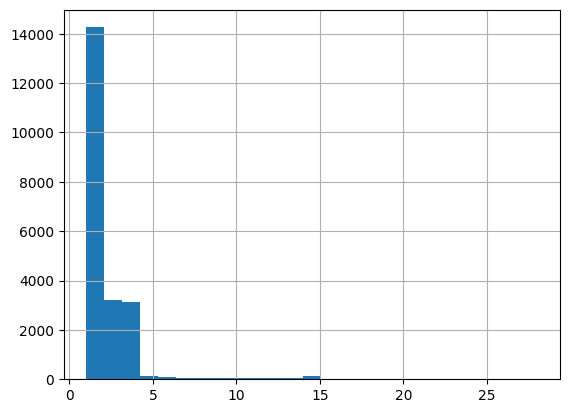

In [77]:
orders['quantity'].hist(bins=25)

<AxesSubplot:ylabel='quantity'>

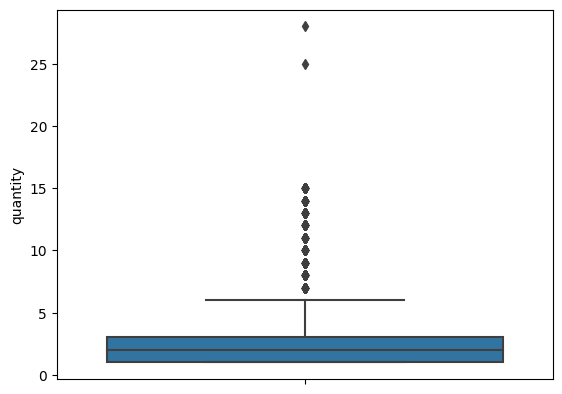

In [71]:
sns.boxplot(data=orders, y='quantity')

## Проанализируем продажи в срезе временных рядов

<AxesSubplot:ylabel='total_price'>

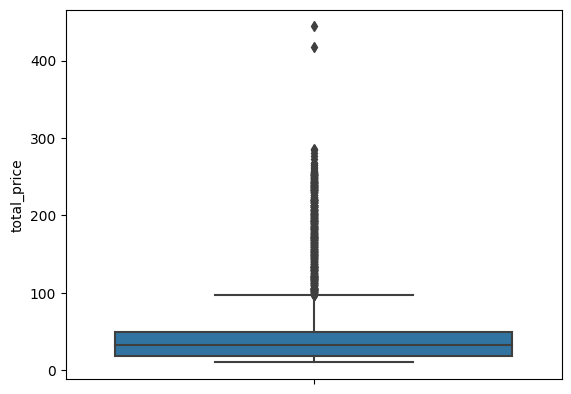

In [78]:
sns.boxplot(data=orders, y='total_price')

<AxesSubplot:>

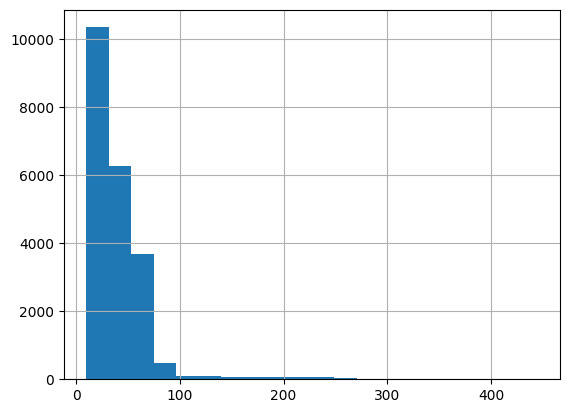

In [80]:
orders['total_price'].hist(bins=20)

In [92]:
months = orders.groupby('order_month')['total_price'].sum().reset_index()

<AxesSubplot:xlabel='order_month', ylabel='total_price'>

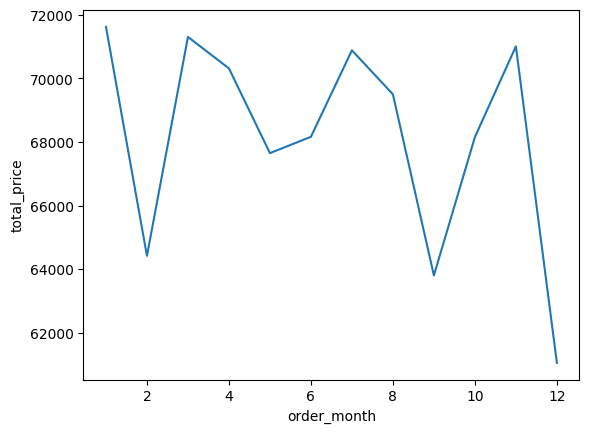

In [101]:
sns.lineplot(data=months, x='order_month', y='total_price')

In [96]:
days = orders.groupby('order_day_number').agg({'total_price': 'sum', 'order_id': 'count'}).reset_index()

<AxesSubplot:xlabel='order_day_number', ylabel='total_price'>

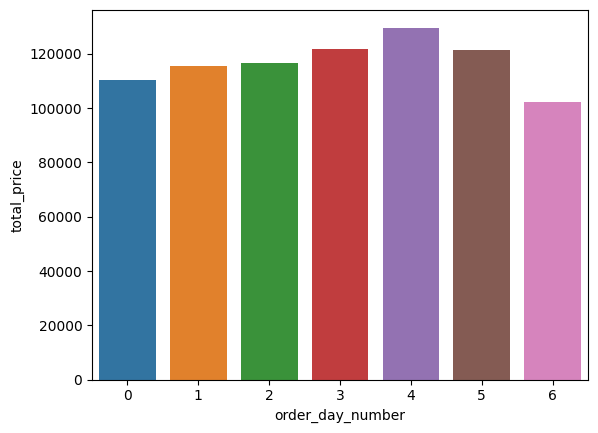

In [97]:
sns.barplot(data=days, x='order_day_number', y='total_price')

In [99]:
hours = orders.groupby('order_hour').agg({'total_price': 'sum', 'order_id': 'count'}).reset_index()

<AxesSubplot:xlabel='order_hour', ylabel='total_price'>

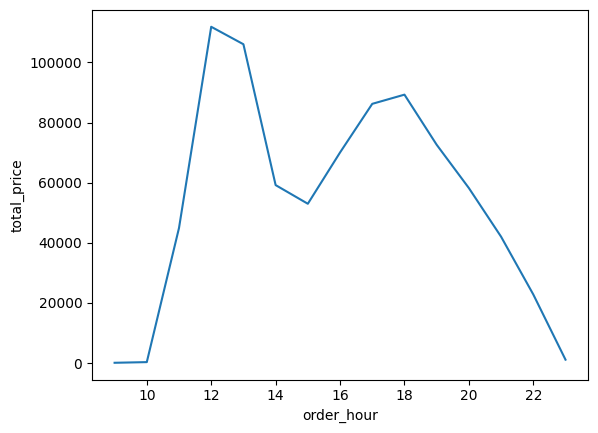

In [102]:
sns.lineplot(data=hours, x='order_hour', y='total_price')